### Tasks To Be Performed: 

1. Perform a Detailed EDA for the Data with inferences from each of the actions. 


2. Using Statistical Analysis, find out statistical evidence for the following: 

    a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same? 
    
    b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same? 
    
    c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"
    
    d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

#### User_ID: 
This column represents the unique identifier for each user or customer who made the purchase.

#### Product_ID: 
This column contains the unique identifier for each product that was purchased.

#### Gender: 
This column indicates the gender of the user who made the purchase. It could have values such as "Male" or "Female."

#### Age: 
This column represents the age group or category of the user who made the purchase. It can be categorized into different age ranges, such as "18-25," "26-35," "36-45," and so on.

#### Occupation: 
This column denotes the occupation of the user who made the purchase. It may include numerical or categorical values representing different professions or job types.

#### City_Category: 
This column categorizes the city or region from which the purchase was made. It typically includes labels like "A," "B," or "C" to represent different city categories or types.

#### Stay_In_Current_City_Years: 
This column indicates the number of years the user has been living in their current city. It may have values such as "0" for less than a year, "1" for one year, "2" for two years, and so on.

#### Marital_Status: 
This column represents the marital status of the user. It could be encoded as "0" for unmarried/single and "1" for married.

#### Product_Category_1:
This column refers to the primary category of the purchased product. It may contain numerical or categorical values representing different product categories.

#### Product_Category_2: 
This column corresponds to the secondary category of the purchased product. It could also contain numerical or categorical values, but it is not necessarily present in all datasets.

#### Product_Category_3: 
This column represents the tertiary category of the purchased product. Similar to the previous column, it may include numerical or categorical values and might not be present in all datasets.

#### Purchase: 
This column contains the amount or value of the purchase made by the user. It represents the monetary value or quantity associated with the transaction.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("purchase_data.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
data.shape

(263015, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [ ]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [ ]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].replace("4+", "4")

In [ ]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0', nan], dtype=object)

In [ ]:
data["Stay_In_Current_City_Years"] = pd.to_numeric(data["Stay_In_Current_City_Years"], errors = "coerce")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.1+ MB


In [ ]:
#Cheching the null values in whole dataset

data.isna().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
data.shape

(80582, 12)

In [ ]:
#Label encoding on categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data["Gender"] = le.fit_transform(data["Gender"])
print("Gender", le.classes_)

Gender ['F' 'M']


In [ ]:
data["Gender"].unique()

array([0, 1])

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,0,0-17,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,P00184942,1,46-50,7.0,B,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,P00145042,1,26-35,20.0,A,1.0,1.0,1.0,2.0,5.0,15665.0
14,1000006,P00231342,0,51-55,9.0,A,1.0,0.0,5.0,8.0,14.0,5378.0
16,1000006,P0096642,0,51-55,9.0,A,1.0,0.0,2.0,3.0,4.0,13055.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  int64  
 3   Age                         80582 non-null  object 
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 8.0+ MB


In [ ]:
data["Product_ID"] = le.fit_transform(data["Product_ID"])
print("Product_ID", le.classes_)

Product_ID ['P00000142' 'P00000242' 'P00000642' 'P00001042' 'P00001142' 'P00001542'
 'P00002142' 'P00002242' 'P00003442' 'P00004242' 'P00004842' 'P00005542'
 'P00005942' 'P00006942' 'P00008042' 'P00010542' 'P00010742' 'P00010942'
 'P00011942' 'P00012242' 'P00014442' 'P00014642' 'P00014842' 'P00015542'
 'P00015642' 'P00015842' 'P00015942' 'P00016342' 'P00016442' 'P00016542'
 'P00016742' 'P00016842' 'P00019042' 'P00019342' 'P00021842' 'P00023342'
 'P00024142' 'P00025242' 'P00025342' 'P00025442' 'P00026042' 'P00028442'
 'P00028542' 'P00029542' 'P00030842' 'P00030942' 'P00031842' 'P00032042'
 'P00034042' 'P00034142' 'P00034242' 'P00034442' 'P00034742' 'P00035042'
 'P00035342' 'P00035542' 'P00035842' 'P00035942' 'P00036842' 'P00037142'
 'P00038042' 'P00038142' 'P00041342' 'P00041442' 'P00042142' 'P00043842'
 'P00044242' 'P00045042' 'P00045142' 'P00045242' 'P00045342' 'P00046742'
 'P00048042' 'P00048342' 'P00050042' 'P00050342' 'P00050442' 'P00051942'
 'P00053042' 'P00053342' 'P00053442' 'P0

In [ ]:
data["Product_ID"].unique()

array([391, 284, 211, 363, 517,  58, 393, 438, 114, 123, 276, 234, 349,
       147, 508, 221, 154, 146, 275,  64, 385,  33, 107, 300, 229, 152,
        51, 351, 168, 457, 298, 239, 151, 183, 176,  90, 395, 487, 402,
       358, 419, 271,   2, 426, 411, 481,  47,  46, 332,  71, 427, 420,
       404,  40, 342, 137, 179, 479, 160,  59, 307, 125,  41, 416, 122,
       204,  45, 149, 412, 454,  77,  16, 158,  44, 113, 456, 486,   0,
        48, 191,  36, 337, 243,  29,  30, 359, 215, 190, 382, 384, 299,
       143, 213, 222, 371, 260, 145, 170, 228, 515, 273, 428, 153, 254,
       309, 320, 256,   8, 198, 314,  98,  23, 138,  84,  52,  82, 264,
       365, 368, 184, 246, 516, 108, 357,  22, 413, 335, 165, 203, 130,
        55,  89,  92, 231, 106,  76, 520, 330, 126, 128,  56, 415, 489,
       115, 208, 181, 210, 326, 397, 304,  94, 163,  26, 484, 296, 375,
       410,  85, 386, 485,  39, 116, 387, 448, 439, 483, 434, 521,   4,
       297, 322,   9, 267, 117, 459, 174, 241, 159, 378,  96, 29

In [ ]:
data["User_ID"] = le.fit_transform(data["User_ID"])
print("User_ID", le.classes_)

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]


In [ ]:
data["User_ID"].unique()

array([   0,    3,    4, ..., 4062, 4098, 4189])

In [ ]:
data["Age"] = le.fit_transform(data["Age"])
print("Age", le.classes_)

Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


In [ ]:
data["Age"].unique()

array([0, 4, 2, 5, 3, 1, 6])

In [ ]:
# 0-17'  = 0
# 18-25' = 4
# 26-35'  = 2
# 36-45'  = 55
# 46-50' = 3
# 51-55' = 1
# 55+' = 6

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,7.0,B,2.0,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,20.0,A,1.0,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,9.0,A,1.0,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,9.0,A,1.0,0.0,2.0,3.0,4.0,13055.0


In [ ]:
data["City_Category"] = le.fit_transform(data["City_Category"])
print("City_Category", le.classes_)

City_Category ['A' 'B' 'C']


In [ ]:
data["City_Category"].unique()

array([0, 1, 2])

In [ ]:
# A - 0
# B - 1
# C - 2

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0


In [ ]:
#Five number summary

data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,2785.306930,229.309585,0.776216,2.451540,8.173426,1.087513,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1610.765451,144.593979,0.416782,1.338429,6.487913,0.758965,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1387.000000,110.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,2828.000000,206.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,4092.000000,351.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,5696.000000,524.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


In [ ]:
#Let us know difference between value_counts, unique and nunique

data["Age"].value_counts()

2    32313
3    15908
1    15321
4     6365
5     5489
6     2829
0     2357
Name: Age, dtype: int64

In [ ]:
data["Age"].unique()

array([0, 4, 2, 5, 3, 1, 6])

In [ ]:
data["Age"].nunique()

7

In [ ]:
#Visualization to understand my data more properly and make inference



In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0


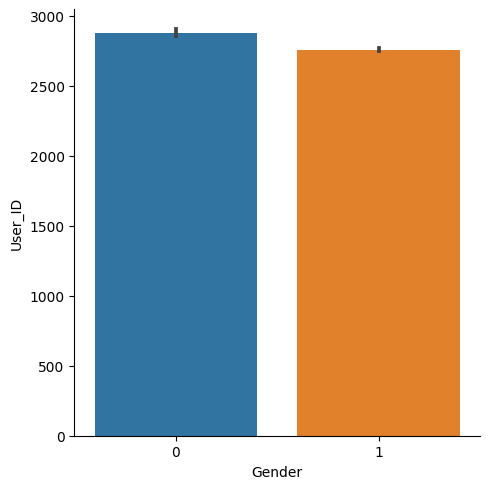

In [ ]:
#Hint :  i want to see if males are purchasing more or females

sns.catplot(x = "Gender", y = "User_ID", data = data, kind = "bar")

# Amongest all the purchases made , majority of the purchases were made by Females

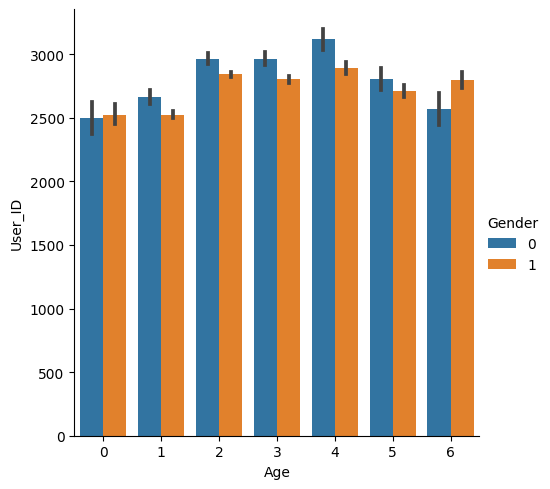

In [ ]:
#Hint :  Now i want to compare age wise comparison on male and female

sns.catplot( x = "Age", y = "User_ID", hue = "Gender", kind = "bar", data = data)

In [ ]:
# 0-17'  = 0
# 18-25' = 4
# 26-35'  = 2
# 36-45'  = 55
# 46-50' = 3
# 51-55' = 1
# 55+' = 6

1.  Females from the age group 18-25(4) is the highest active in purchasing,

2. Malesfrom the age group 18-25(4) and 26-35(2) is the highest active in purchasing,

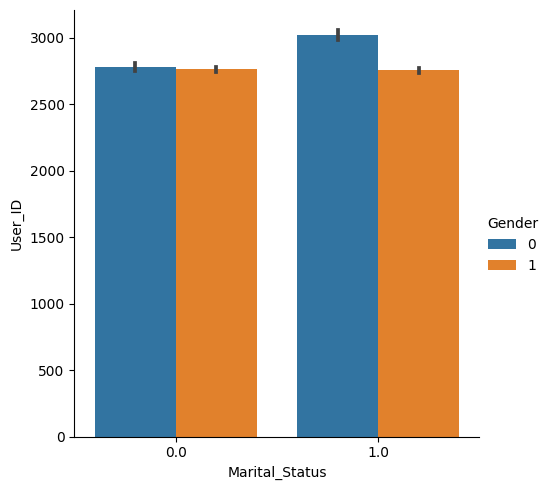

In [ ]:
#Now i want to compare married and unmarried people

sns.catplot(data = data, x = "Marital_Status" , y = "User_ID", hue = "Gender", kind = "bar" )

# The gender ration of males and females are almost equal for unmarried people, but once the girls get married her expenses increases

<Axes: xlabel='Product_Category_1', ylabel='count'>

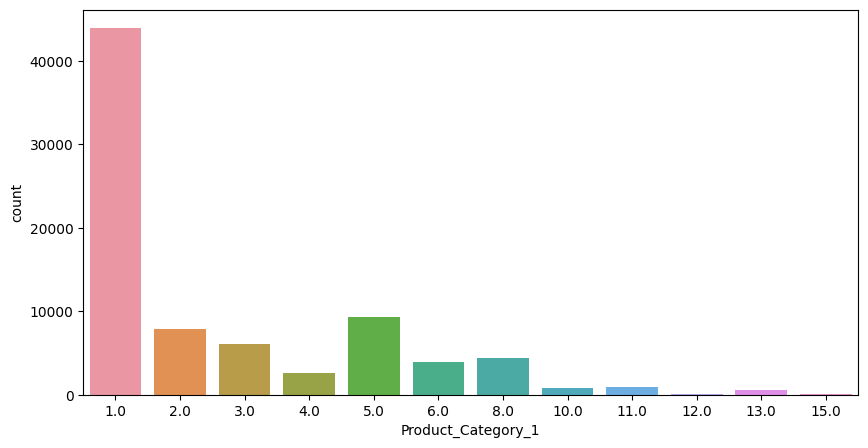

In [ ]:
#Frequency of product category 1

plt.figure(figsize = (10,5))

sns.countplot(x = data["Product_Category_1"])

<Axes: xlabel='Product_Category_2', ylabel='count'>

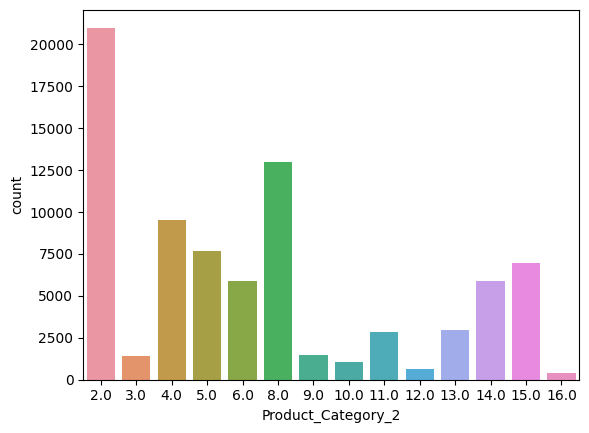

In [ ]:
sns.countplot(x = data["Product_Category_2"])

<Axes: xlabel='Product_Category_3', ylabel='count'>

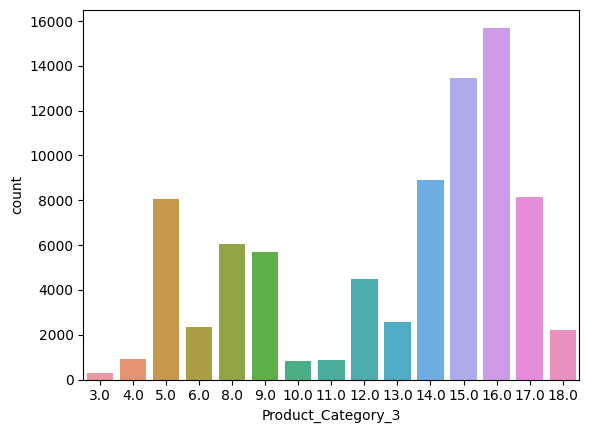

In [ ]:
sns.countplot(x = data["Product_Category_3"])

<Axes: xlabel='Occupation', ylabel='count'>

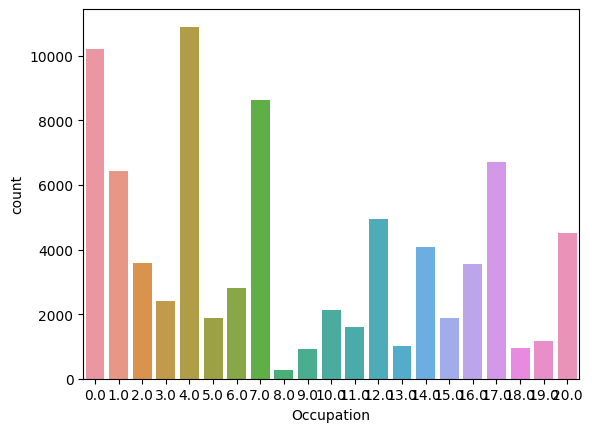

In [ ]:
sns.countplot( x = data["Occupation"])

<ipython-input-78-bdd601a8c4a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data["Purchase"])


<Axes: ylabel='Density'>

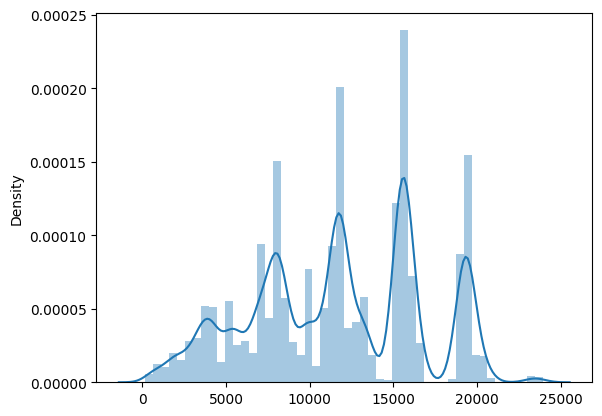

In [ ]:
sns.distplot(x = data["Purchase"])

In [ ]:
# Purchases in not accumulated in a range , rather varies in different intervals

In [ ]:
#Checking correlation

corr = data.corr()
corr

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.008247,-0.031117,0.037451,-0.011876,0.019336,-0.027410,0.015240,0.007023,0.007372,0.002163,0.000603
Product_ID,-0.008247,1.000000,0.014412,0.021192,0.007119,-0.025223,-0.003153,0.010618,0.019471,0.024563,0.019219,-0.108025
Gender,-0.031117,0.014412,1.000000,-0.008751,0.110055,-0.002937,0.012817,-0.010459,-0.069258,-0.016422,0.033820,0.060034
Age,0.037451,0.021192,-0.008751,1.000000,0.100146,0.098402,-0.010013,0.311430,0.052910,0.047808,0.054444,0.023078
Occupation,-0.011876,0.007119,0.110055,0.100146,1.000000,0.038839,0.025064,0.031437,-0.013515,0.000714,0.013637,0.022187
City_Category,0.019336,-0.025223,-0.002937,0.098402,0.038839,1.000000,0.015376,0.043686,-0.020706,-0.004918,-0.000876,0.076327
Stay_In_Current_City_Years,-0.027410,-0.003153,0.012817,-0.010013,0.025064,0.015376,1.000000,-0.015000,-0.006038,-0.000815,0.000347,0.003687
Marital_Status,0.015240,0.010618,-0.010459,0.311430,0.031437,0.043686,-0.015000,1.000000,0.016434,0.011027,0.016609,0.008585
Product_Category_1,0.007023,0.019471,-0.069258,0.052910,-0.013515,-0.020706,-0.006038,0.016434,1.000000,0.496955,0.229194,-0.399093
Product_Category_2,0.007372,0.024563,-0.016422,0.047808,0.000714,-0.004918,-0.000815,0.011027,0.496955,1.000000,0.545300,-0.152532


<Axes: >

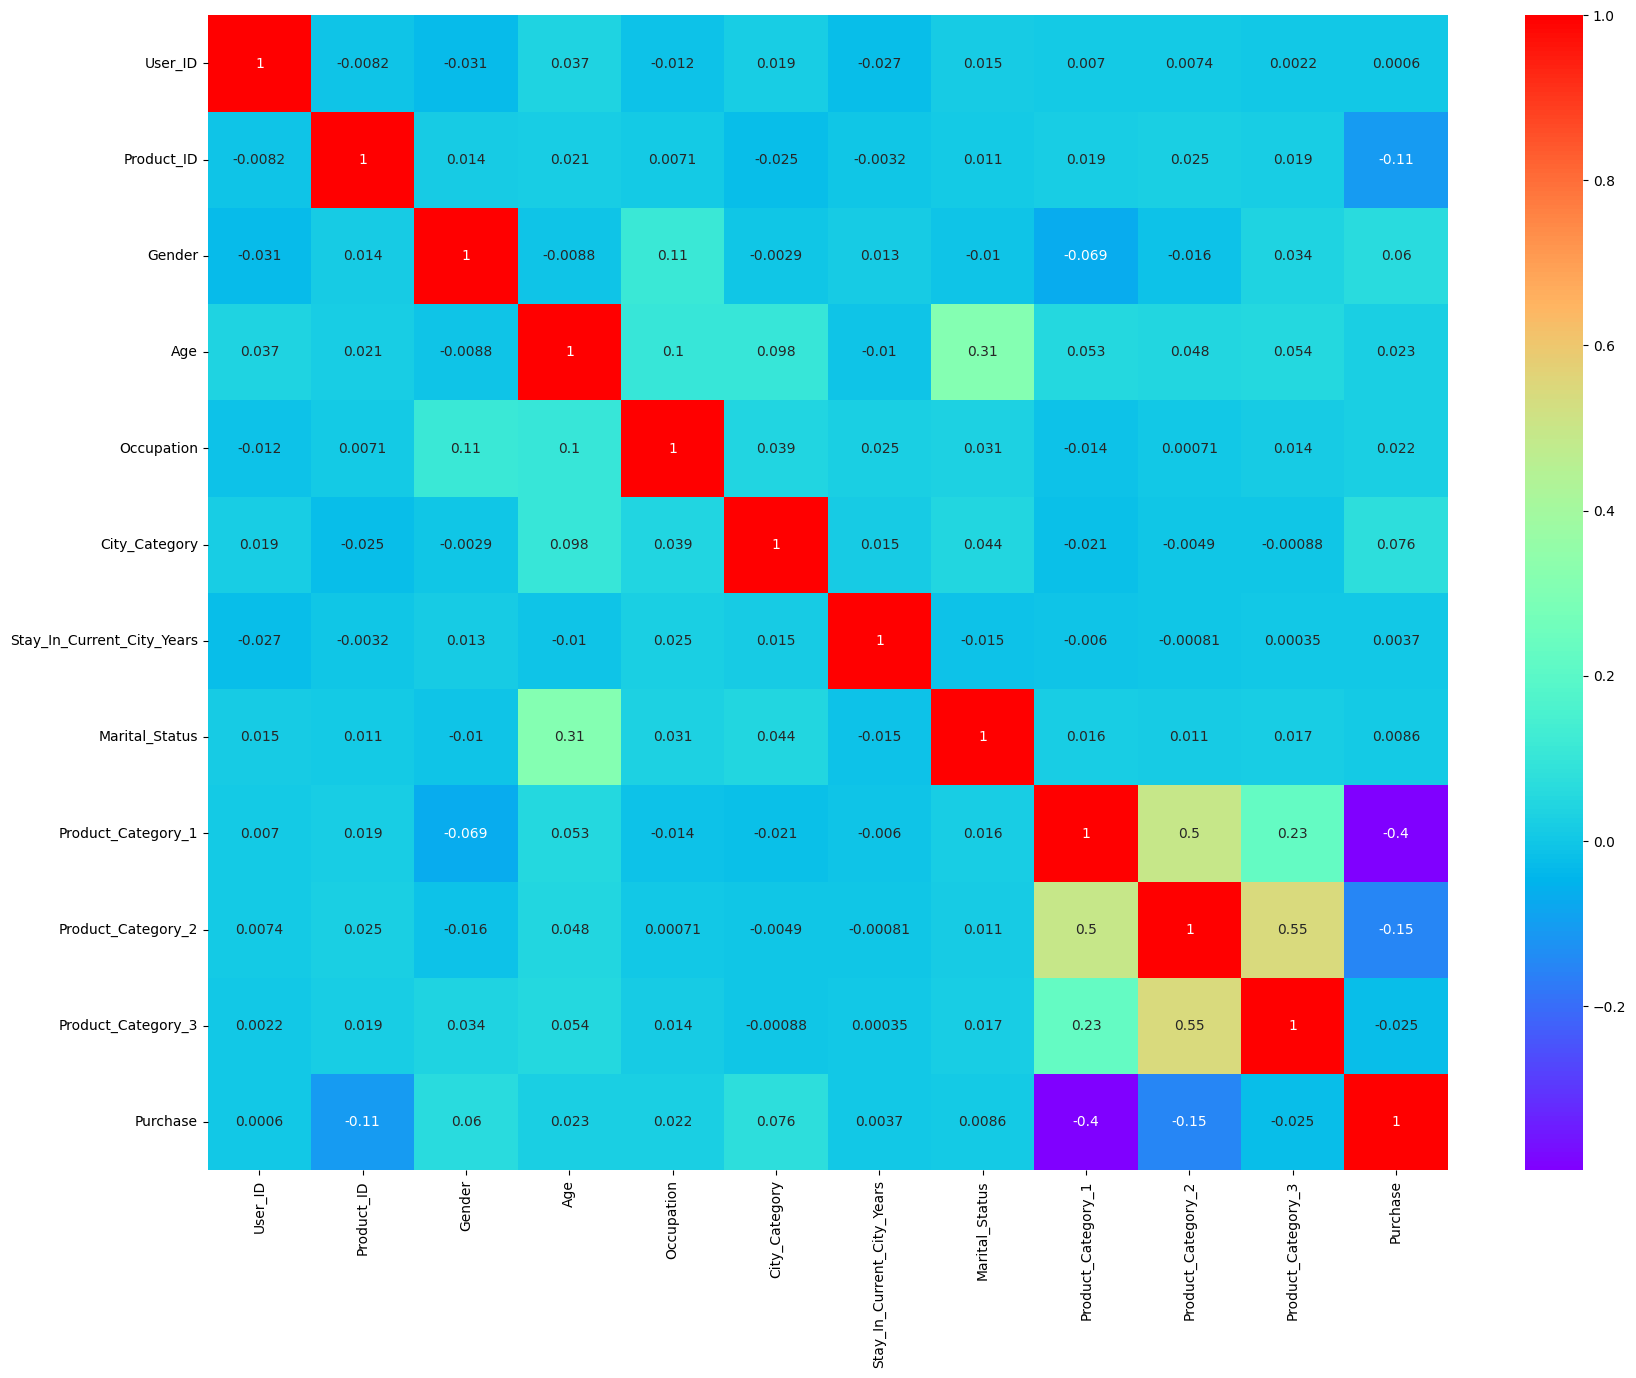

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot  = True, cmap = "rainbow")

#Statistical Analysis

# let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

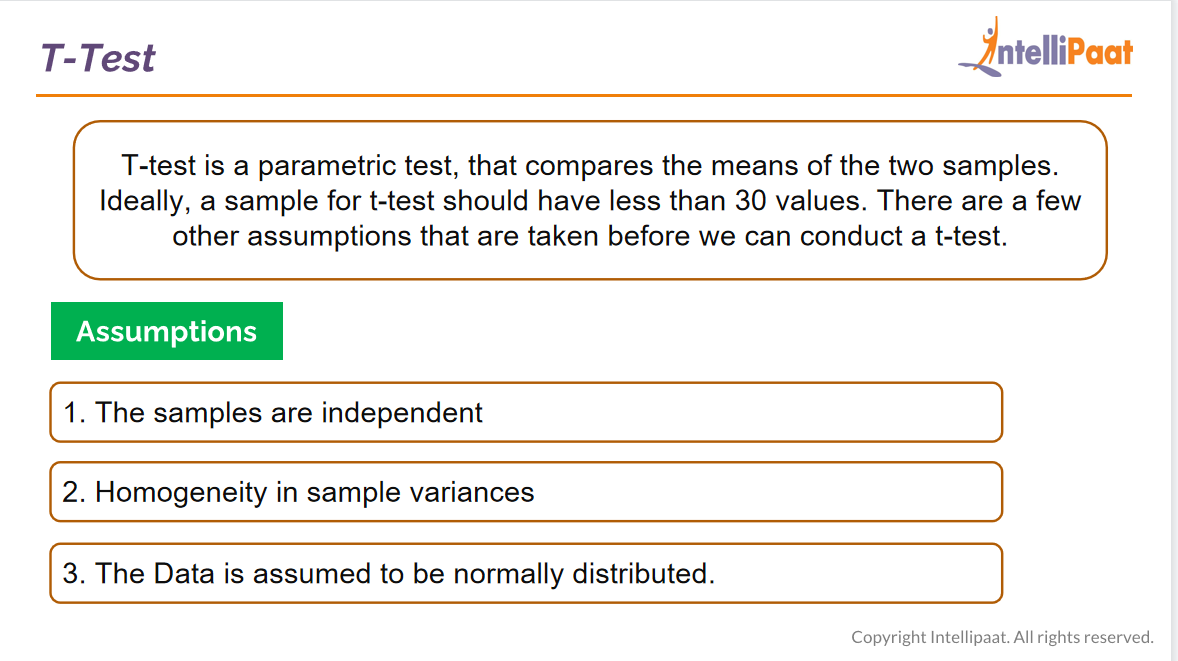

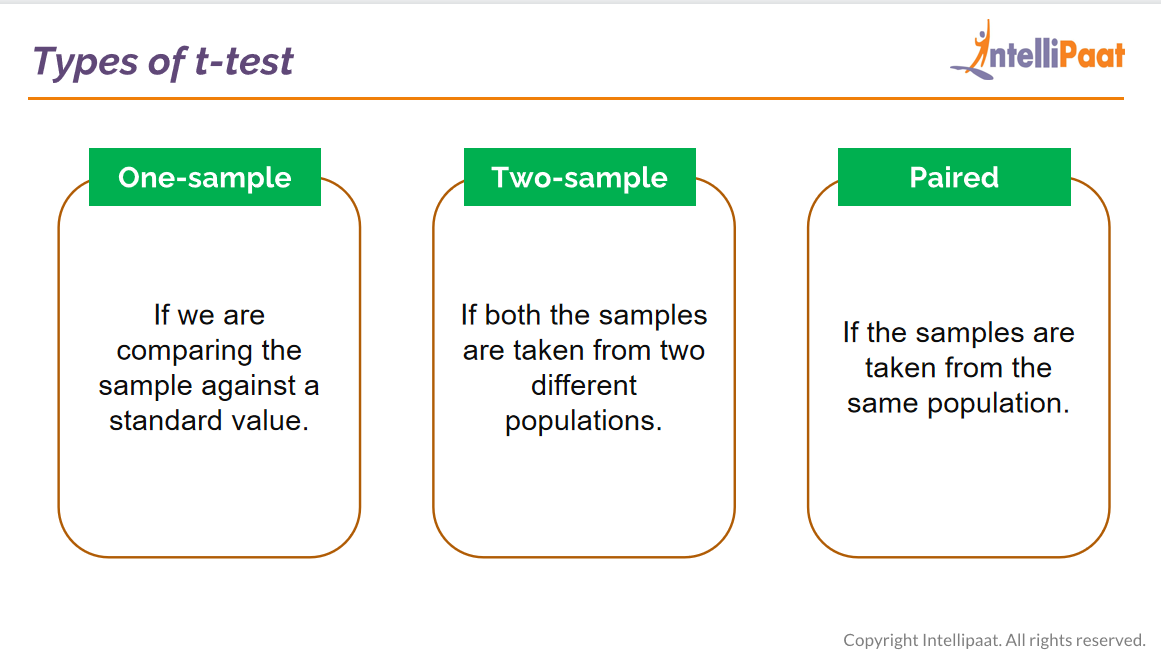![image.png](attachment:image.png)

In [ ]:
#One sample t test

# Null hypo - the mean of men will be 10000
# Alt hypo - the mean will not be 10000

#If p value is less than 0.05 , we need to reject null hypo otherwise accept it

In [ ]:
new_data = data.loc[(data["Age"] == 4) & data["Gender"] == 1]

In [ ]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,3,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
54,11,275,1,4,1.0,2,3.0,1.0,1.0,5.0,6.0,12107.0
235,40,149,1,4,17.0,1,3.0,1.0,1.0,2.0,14.0,19072.0
241,40,298,1,4,17.0,1,3.0,1.0,3.0,4.0,5.0,13251.0
527,90,203,1,4,0.0,2,4.0,1.0,5.0,8.0,14.0,3746.0


In [ ]:
sample_size = 25

sample1 = new_data.sample(sample_size, random_state = 0)

In [ ]:
pos_mean = 10000

In [ ]:
from scipy.stats import ttest_1samp

t_stat , p_value = ttest_1samp(sample1["Purchase"], pos_mean)
print(t_stat, p_value)

1.1003586800081915 0.2820905682654722


In [ ]:
#P value is greater than 0.05, accept null hypo

#Mean of male of age other than 18-25 is also 10000


## Let's Suppose, It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

In [ ]:
#null hypo - proportion is 35%
#alt hypo - propertion is not 35%

data_new = data.loc[(data["Purchase"] > 10000)]

In [ ]:
data_new.shape

(49390, 12)

In [ ]:
count1 = data_new["Gender"].value_counts()[0]

#number of observations
nobs1 = len(data_new["Gender"])

#Hypothesised value

p0 = 0.35

In [ ]:
#One sample z test

from statsmodels.stats.proportion import proportions_ztest

z_stat , p_val = proportions_ztest(count = count1 , nobs = nobs1, value = p0, alternative = "two-sided")
print(z_stat , p_val)

-79.12020590883206 0.0


In [ ]:
#p value is less than 0.05 , reject null

# proportion is not 35%

## Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"

In [ ]:
data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 4)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 4)]

In [ ]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [ ]:
#computing f statistic
from scipy.stats import f
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
print(F)

1.071824147188011


In [ ]:
#calculating the degrees of freedom 
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

# degrees of freedom in the F-test indicate the number of independent pieces of information available for estimating variances.

499 499


In [ ]:
#p-value
import scipy
scipy.stats.f.cdf(F, df1, df2)

0.7806083254395487

In [ ]:
# p value is greater than 0.05 , so accept the null hypo

# avg of variance of male and female is equal